Total points for this HW: 100.

Please note: Copying and pasting other people's work is absolutely prohibited.  Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

### Question 1: Accuracy and interpretability (10 pts)

a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3 pts)

**Answer: When we using historical data of Uber to predict the probability of a customer will turn to Lyft, interpretability is more important. Because what we need is if a customer is tend to churn, as long as the probability we predicted is higher than the threshold we set, then a special offer will be offer to this customer. Accuracy is not essential in this case. Since we want to be able to explain our prediction using simple and interpretable set of rules (i.e. which kind of customer are more likely to churn), we should use decision trees rather than random forests. **

b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3 pts)

**Answer: When we dealing with fraud detection, accuracy is paramount and interpretability would be less important. If the prediction model does not have an accurate performance, one case of fraud could lead to serious deficit problem in a bank. Random forest has been found to be resistant to overfitting and provides a good estimate of the generalization error. So if accuracy is more important, random forest should be used.**

c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4 pts)

**Answer: **
- **We can balancing the two world by train a small, interpretable ensemble model. We could train an interpretable regression model and an intepretable decision tree and average their predictions.**
- **Try surrogate models for explaining black box models. Surrogate models are interpretable models used as a proxy to explain black box models. For example, fit a black box model to your training data. Then train a single decision tree on the original training data, but instead of using the actual target in the training data, use the predictions of the more complex algorithm as the target for this single decision tree. This single decision tree will likely be a more interpretable proxy you can use to explain the more complex logic of the black box model.**

###  Question 2: Build a decision tree for classification, step by step, following the lecture notes. Note that the dataset has been slightly modified, so you will get a different tree than the one shown in the lecture notes.  (30 points)

In [1]:
import pandas as pd
import numpy as np

In [2]:
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO

In [3]:
thefile = StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\nbad,4,93,light')
df = pd.read_csv(thefile)
df

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium
5,bad,4,94,light
6,bad,4,95,light
7,bad,8,139,weighty
8,bad,8,190,weighty
9,bad,8,145,weighty


### Please use numpy and pandas to do the computation for parts a) through f).  Do not use an existing decision tree implementation like sklearn for this question.

a) Start with the entire dataset and find the most common MPG value. (2 pts)

In [4]:
# your code here
df['MPG'].mode()

0    bad
dtype: object

In [5]:
def InformationGain(goodY,badY,goodN,badN):
    def F(X,Y):
        val1 = X*np.log2(1.*(X+Y)/X) if X>0 else 0
        val2 = Y*np.log2(1.*(X+Y)/Y) if Y>0 else 0
        return val1+val2
    return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)

b) Enumerate all the possible binary questions you could ask for each discrete-valued variable.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts)

In [6]:
print(df.cylinders.unique())

[4 6 8]


In [72]:
cylinders = [4,6,8]

In [82]:
def cylinsplit(df, cylinders):
    header = ['cylinders', 'goodY', 'badY', 'goodN', 'badN', 'info_gain']
    cydf = []
    for i in cylinders:
        goodY = 0
        badY = 0
        goodN = 0
        badN = 0
        for row in df.iterrows():
            if row[1]['cylinders'] == i:
                if row[1]['MPG'] == 'good':
                    goodY += 1
                else:
                    badY += 1
            else:
                if row[1]['MPG'] == 'good':
                    goodN += 1
                else:
                    badN += 1
            info_gain = InformationGain(goodY, badY, goodN, badN)
        row = [i,goodY, badY, goodN, badN, info_gain]
        cydf.append(row)
    cydf = pd.DataFrame(np.array(cydf),  columns = header)
    return cydf
    print("cylinder = %s, goodY = %s, badY = %s, goodN = %s, badN = %s, info_gain = %.3f"%(i,goodY, badY, goodN, badN, info_gain))

In [83]:
cydf = cylinsplit(df,cylinders)
cydf

,cylinders,goodY,badY,goodN,badN,info_gain
0,4.0,5.0,4.0,0.0,11.0,0.365294
1,6.0,0.0,6.0,5.0,9.0,0.153078
2,8.0,0.0,5.0,5.0,10.0,0.122556


In [138]:
cy = cydf[cydf['info_gain']==(max(cydf['info_gain']))]
cy

,cylinders,goodY,badY,goodN,badN,info_gain
0,4.0,5.0,4.0,0.0,11.0,0.365294


In [9]:
print(df.weight.unique())

['light' 'medium' 'weighty']


In [56]:
weight = ['light','medium','weighty']

In [84]:
def weightsplit(df,weight):
    header = ['weight', 'goodY', 'badY', 'goodN', 'badN', 'info_gain']
    wgdf = []
    for i in weight:
        goodY = 0
        badY = 0
        goodN = 0
        badN = 0
        for row in df.iterrows():
            if row[1]['weight'] == i:
                if row[1]['MPG'] == 'good':
                    goodY += 1
                else:
                    badY += 1
            else:
                if row[1]['MPG'] == 'good':
                    goodN += 1
                else:
                    badN += 1
            info_gain = InformationGain(goodY, badY, goodN, badN)
        row = [i,goodY, badY, goodN, badN, info_gain]
        wgdf.append(row)
    wgdf = pd.DataFrame(np.array(wgdf),  columns = header)
    return wgdf
    #print("weight = %s, goodY = %s, badY = %s, goodN = %s, badN = %s, info_gain = %.3f"%(i,goodY, badY, goodN, badN, info_gain))
    #return i, goodY, badY, goodN, badN, info_gain

In [123]:
wgdf = weightsplit(df,weight)
wgdf

,weight,goodY,badY,goodN,badN,info_gain
0,light,3,3,2,12,0.0971071794515
1,medium,2,6,3,9,8.881784197e-17
2,weighty,0,6,5,9,0.15307795339


In [131]:
wgdf["info_gain"] = pd.to_numeric(wgdf["info_gain"])

In [137]:
wg = wgdf[wgdf['info_gain']==(max(wgdf['info_gain']))]
wg

,weight,goodY,badY,goodN,badN,info_gain
2,weighty,0,6,5,9,0.153078


c) Enumerate all the possible binary questions you could ask for the real-valued variable HP.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts) 

NOTE: if you'd like, you can just use all midpoints between consecutive values of the sorted HP attribute.  You are not required to exclude provably suboptimal questions like we did in the lecture.

In [12]:
# your code here
print(df.HP.unique())

[ 75  90 110 175  95  94 139 190 145 100  92 170  89  65  85  81  93]


In [13]:
hpmid = [70,78,83,87.5,91,92.5,93.5,94.5,97.5,105]

In [86]:
def hpsplit(df,hpmid): 
    header = ['HP', 'goodY', 'badY', 'goodN', 'badN', 'info_gain']
    hpdf = []
    for i in hpmid:
        goodY = 0
        badY = 0
        goodN = 0
        badN = 0
        for row in df.iterrows():
            if row[1]['HP'] > i:
                if row[1]['MPG'] == 'good':
                    goodY += 1
                else:
                    badY += 1
            else:
                if row[1]['MPG'] == 'good':
                    goodN += 1
                else:
                    badN += 1
        info_gain = InformationGain(goodY, badY, goodN, badN)
        row = [i,goodY, badY, goodN, badN, info_gain]
        hpdf.append(row)
    hpdf = pd.DataFrame(np.array(hpdf),  columns = header)
    return hpdf
#         print("HP = %s, goodY = %s, badY = %s, goodN = %s, badN = %s, info_gain = %.3f"%(i,goodY, badY, goodN, badN, info_gain))

In [87]:
hpdf = hpsplit(df,hpmid)
hpdf

,HP,goodY,badY,goodN,badN,info_gain
0,70.0,4.0,15.0,1.0,0.0,0.105915
1,78.0,3.0,15.0,2.0,0.0,0.226258
2,83.0,2.0,15.0,3.0,0.0,0.367103
3,87.5,2.0,14.0,3.0,1.0,0.214171
4,91.0,1.0,13.0,4.0,2.0,0.275927
5,92.5,0.0,13.0,5.0,2.0,0.509186
6,93.5,0.0,12.0,5.0,3.0,0.429505
7,94.5,0.0,11.0,5.0,4.0,0.365294
8,97.5,0.0,8.0,5.0,7.0,0.223357
9,105.0,0.0,6.0,5.0,9.0,0.153078


In [139]:
hp = hpdf[hpdf['info_gain']==(max(hpdf['info_gain']))]
hp

,HP,goodY,badY,goodN,badN,info_gain
5,92.5,0.0,13.0,5.0,2.0,0.509186


d) Based on your results for parts b and c, what is the optimal binary split of the data?  Of the two child nodes created by this split, which (if any) would require further partitioning? (4 pts)

**Answer: Based on my results for parts b and c, the optimal binary split of the data is list below:**
- **Cylinders = 4 has the maximum information gain;**
- **Weight = 'weighty' has the maximum information gain;**
- **HP > 92.5 has the maximum information gain.**
- **HP > 92.5 would require further partitioning, since this split has the maximum information gain among these 3 features, and the 'Yes' node contains only bad MPG.**

e) Repeat parts a through d until all training data points are perfectly classified by the resulting tree. (6 pts)

In [140]:
print(cy)
print()
print(wg)
print()
print(hp)

   cylinders  goodY  badY  goodN  badN  info_gain
0        4.0    5.0   4.0    0.0  11.0   0.365294

    weight goodY badY goodN badN  info_gain
2  weighty     0    6     5    9   0.153078

     HP  goodY  badY  goodN  badN  info_gain
5  92.5    0.0  13.0    5.0   2.0   0.509186


**The maximum information gain among these features is 0.509186, which is contribute from HP, so we should start split data from HP < 92.5.**

In [104]:
df1 = df[df.HP<92.5]
df1

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
11,good,4,92,medium
14,good,4,89,medium
15,good,4,65,light
16,bad,6,85,medium
17,good,4,81,light


**The value of MPG are not pure, so we need to split on cylinders this time, since the maximum information gain of cylinder is larger than weight.**

In [106]:
cylinsplit(df1,cylinders)

,cylinders,goodY,badY,goodN,badN,info_gain
0,4.0,5.0,0.0,0.0,2.0,0.863121
1,6.0,0.0,2.0,5.0,0.0,0.863121
2,8.0,0.0,0.0,5.0,2.0,0.000000


**The information gain from cylinders = 4 and 6 are equal, so either rules can leads to perfect purity of tree. I chose cylinder = 4.**

In [107]:
df2=df1[df1.cylinders ==4]
df2

,MPG,cylinders,HP,weight
0,good,4,75,light
11,good,4,92,medium
14,good,4,89,medium
15,good,4,65,light
17,good,4,81,light


**The MPG is purely 'good', so the tree is perfectly classifed, we can stop splitting.**

f) Draw or show the final decision tree in a format of your choice.  The decision to make at each step and the predicted value at each leaf node must be clear. (4 pts)

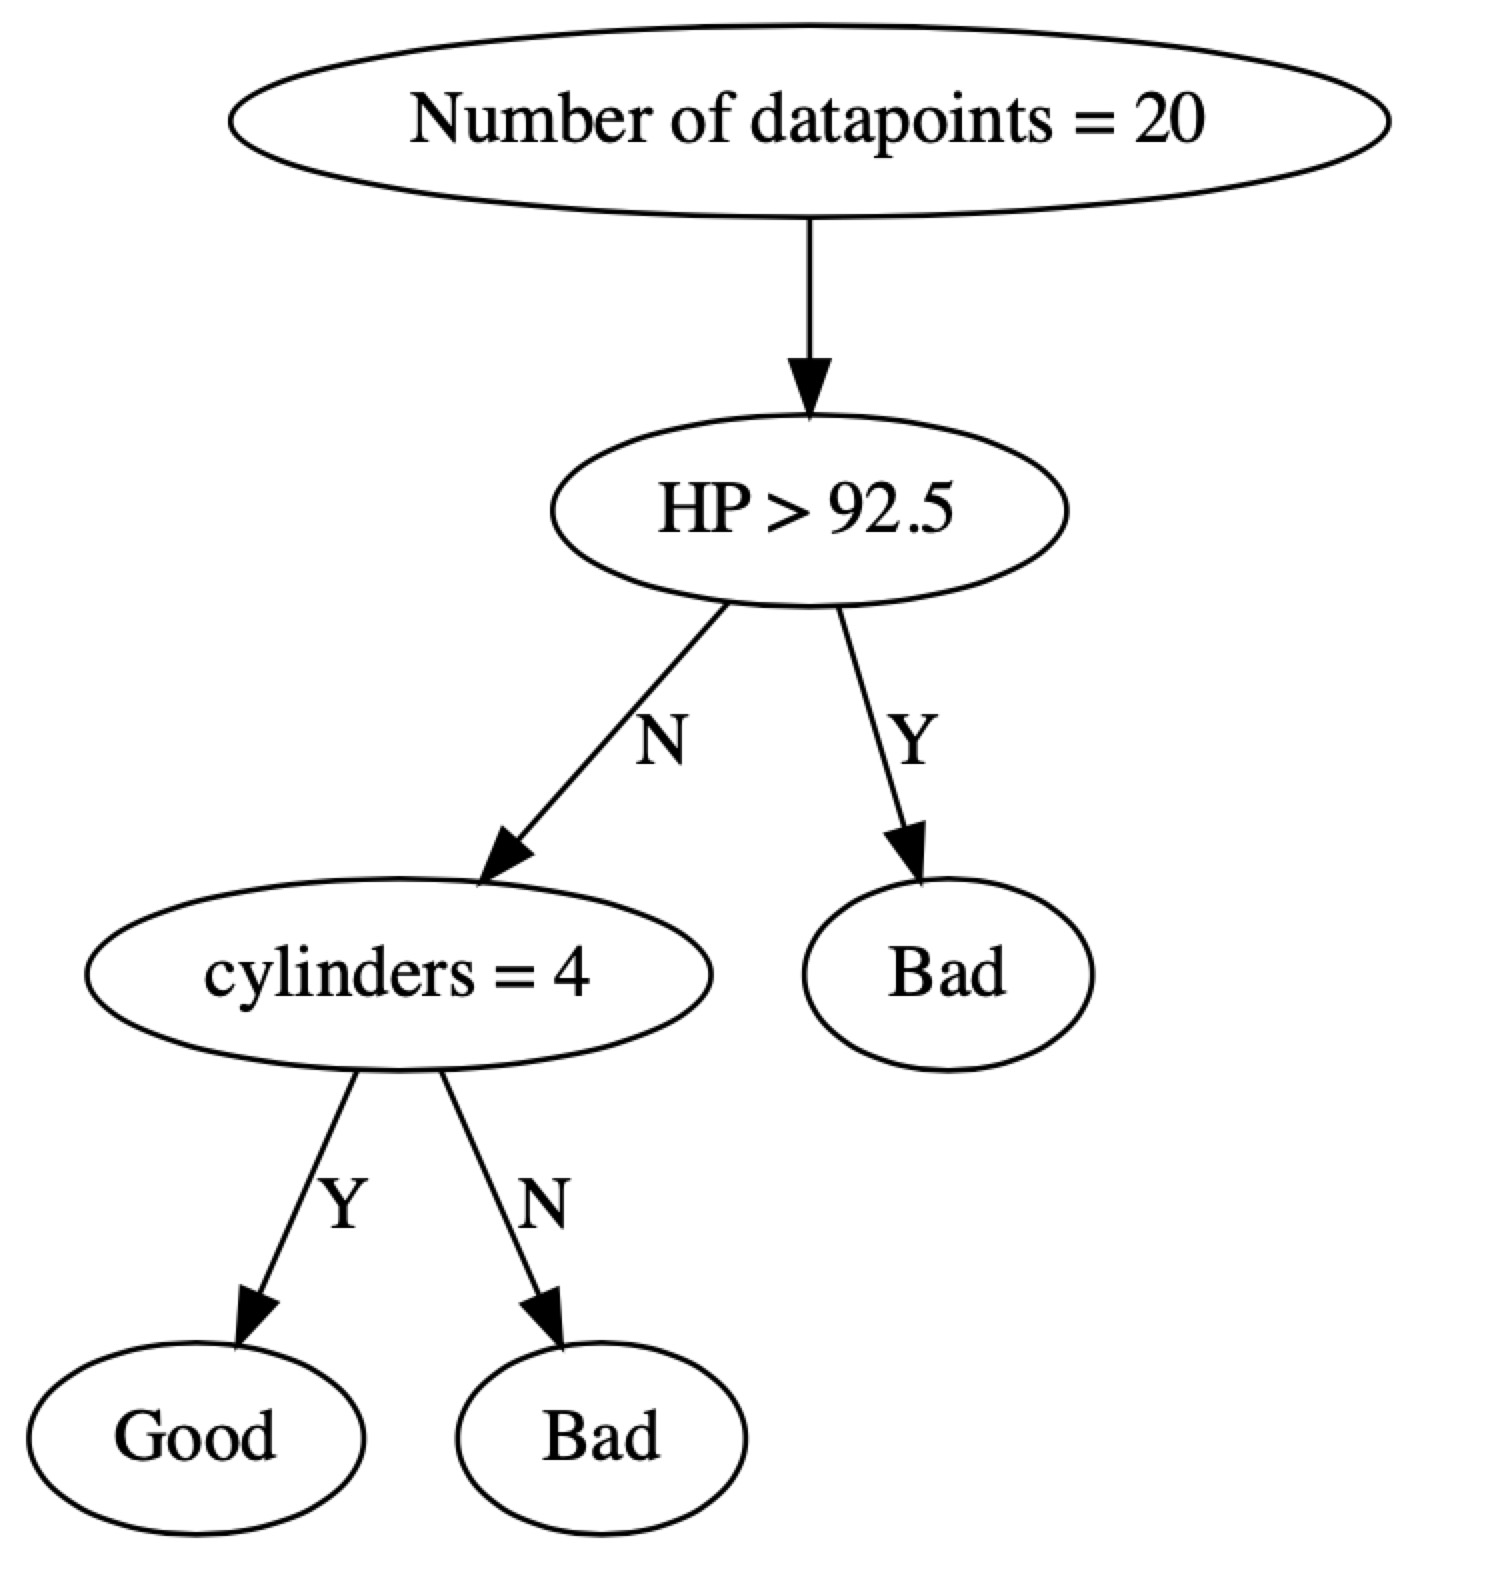

In [143]:
from IPython.display import Image
Image(filename='HW1_Q2_decision tree.png')

g) Classify each of the following four vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  Do this by hand using the tree structure learned in part f. (4 pts)

?,8,70,light -> **bad**

?,6,113,medium -> **bad**

?,4,83,weighty -> **good**

?,4,95,weighty -> **bad**


### Question 3, Predicting burden of disease （40 pts)

In [16]:
data=pd.read_csv("Burden of diarrheal illness by country.csv")
data.head(3)

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high


### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

BurdenOfDisease: Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features with sklearn.tree.DecisionTreeClassifier. 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

a) Please choose a train/test split and choose a hyper-parameter governing model simplicity, for example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier (using the training set) for different values of this parameter and for each such value, record the corresponding classification accuracy on the test set. (10 pts)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# your code here
X=data.iloc[:,1:-1]
y=data.BurdenOfDisease
print(X.shape)
print(y.shape)

(130, 14)
(130,)


In [160]:
OS=[]
for i in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)    
    dt = DecisionTreeClassifier(max_depth= i)
    dt.fit(X_train,y_train)
    OS.append(dt.score(X_test,y_test))
print(OS)

[0.41025641025641024, 0.5641025641025641, 0.64102564102564108, 0.66666666666666663, 0.66666666666666663, 0.69230769230769229, 0.69230769230769229, 0.69230769230769229, 0.66666666666666663, 0.64102564102564108]


b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy. (10 pts)

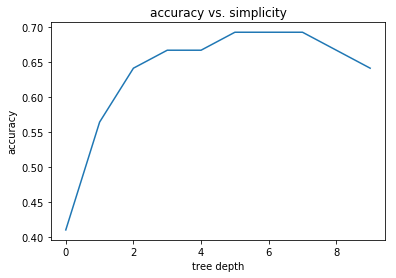

In [161]:
# your code here
import matplotlib.pylab as plt
plt.plot(range(0,10), OS)
plt.xlabel('tree depth')
plt.ylabel('accuracy')
plt.title('accuracy vs. simplicity')
plt.show()

c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use the GridSearchCV package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the out of sample accuracy after tuning the hyper-parameter? (10 pts)

In [175]:
from sklearn.model_selection import GridSearchCV

# your code here
OS=[]
for i in range(10):
    param_grid ={'max_depth':range(1,11)}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
    dt = DecisionTreeClassifier()
    gs=GridSearchCV(dt,param_grid=param_grid,scoring='accuracy')
    rs=gs.fit(X_train,y_train)
    OS.append(rs.score(X_test,y_test))
print("The average out sample: %f"%(np.mean(OS)))
print(rs.best_params_)
#print(rs.score(X_test,y_test))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/en

The average out sample: 0.628205
{'max_depth': 3}


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


d) Visualize a simple decision tree (e.g., with max_depth = 2 or 3) learned from the data.  To do so, given your decision tree dt, you can use the code below, then copy and paste the resulting output into http://www.webgraphviz.com.  Alternatively, if you have graphviz installed on your machine, you can use that. (5 pts)

In [157]:
from sklearn import tree

# your code here
dt1 = DecisionTreeClassifier(max_depth=3)
dt1.fit(X_train, y_train)

thestring=tree.export_graphviz(dt1,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=dt1.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
print(thestring)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="AdultLtrcyRate <= 0.844, samples = 91, value = [24, 23, 27, 17], class = low", fillcolor="#399de50b"] ;
1 [label="GDPPCptaIntDol <= 1988.5, samples = 49, value = [24, 20, 0, 5], class = awful", fillcolor="#e5813923"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="ExtResHlthPctTotExpHlth <= 0.026, samples = 30, value = [23, 7, 0, 0], class = awful", fillcolor="#e58139b1"] ;
1 -> 2 ;
3 [label="samples = 3, value = [0, 3, 0, 0], class = high", fillcolor="#47e539ff"] ;
2 -> 3 ;
4 [label="samples = 27, value = [23, 4, 0, 0], class = awful", fillcolor="#e58139d3"] ;
2 -> 4 ;
5 [label="AdultLtrcyRate <= 0.76, samples = 19, value = [1, 13, 0, 5], class = high", fillcolor="#47e53992"] ;
1 -> 5 ;
6 [label="samples = 11, value = [0, 11, 0, 0], class = high", fillcolor="#47e539ff"] ;
5 -> 6 ;
7 [label="samples = 8, value = [1, 2, 0, 5], clas

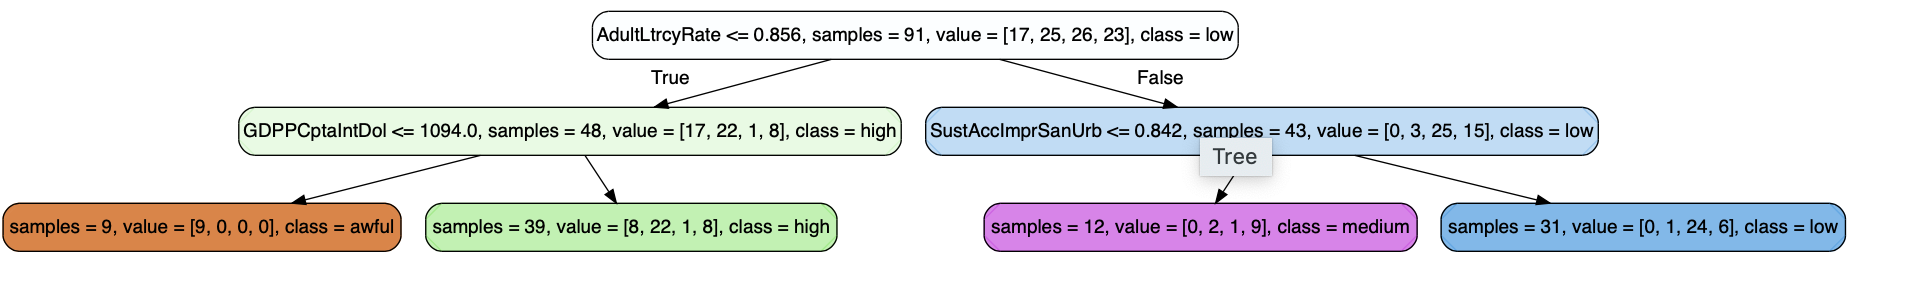

In [158]:
Image(filename='HW1_Q3_decision tree.png')

### Question 4, Fit a random forest to the data from question 3 (20 pts)

a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 3c). (10 pts)

In [176]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# your code here
OS=[]
for i in range(10):
    param_grid = {'n_estimators':range(1,51,5)}
    rf = RandomForestClassifier(n_jobs=-1,max_leaf_nodes=10)
    gs = GridSearchCV(rf,param_grid=param_grid,scoring='accuracy')
    rs = gs.fit(X_train,y_train)
    pred=rs.predict_proba(X_test)[:,1]
    OS.append(rs.score(X_test,y_test))
print("The average out sample: %f"%(np.mean(OS)))
print(rs.best_params_)
# print(rs.score(X_test,y_test))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/en

The average out sample: 0.658974
{'n_estimators': 31}


The avaerage out sample accuracy of random forest model(0.6615) is larger than the average out sample accuracy of decision tree model(0.6359).

b) Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10 pts)

- When using a decision tree model on a given training dataset the accuracy keeps improving with more and more splits. You can easily overfit the data and doesn't know when you have crossed the line unless you are using cross validation (on training data set). The advantage of a simple decision tree is model is easy to interpret, you know what variable and what value of that variable is used to split the data and predict outcome. However, decision trees do not have same predictive accuracy compared to random forest.

- A random forest is like a black box and essentially a collection of Decision Trees. It's a forest you can build and control. You can specify the number of trees you want in your forest(n_estimators) and also you can specify max num of features to be used in each tree. But you cannot control the randomness, you cannot control which feature is part of which tree in the forest, you cannot control which data point is part of which tree. Accuracy keeps increasing as you increase the number of trees, but becomes constant at certain point. Unlike decision tree, it won't create highly biased model and reduces the variance. Random forest will reduce variance part of error rather than bias part, so on a given training data set decision tree may be more accurate than a random forest. But on an unexpected validation data set, Random forest always wins in terms of accuracy.